# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
loan = pd.read_csv('/content/drive/MyDrive/PG_AIML/ML/Project/Loan_Modelling.csv')

In [5]:
# copy data to another variable to keep the original data intact
data = loan.copy()

## Data Overview

* Observations
* Sanity checks

#### View the first and last 5 rows of the dataset.

In [6]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### Understand the shape of the dataset.

In [8]:
data.shape

(5000, 14)



*   The dataset has 5000 rows and 14 columns.



#### Check the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




*   There are 14 numerical variables in the dataset.
*   Out of this, 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', and 'ZIPCode', although shown here as numerical, are categorical variables that are already encoded.



#### Check the Statistical Summary

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0




*   The average age of customers is ~45 years.
*   Customers earn an average of ~74k dollars annually.
* The average work experience of customers is ~20 years.
* The average family size is ~2 with a max of 4.



## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

In [11]:
# function to create histogram and boxplot combined as one
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

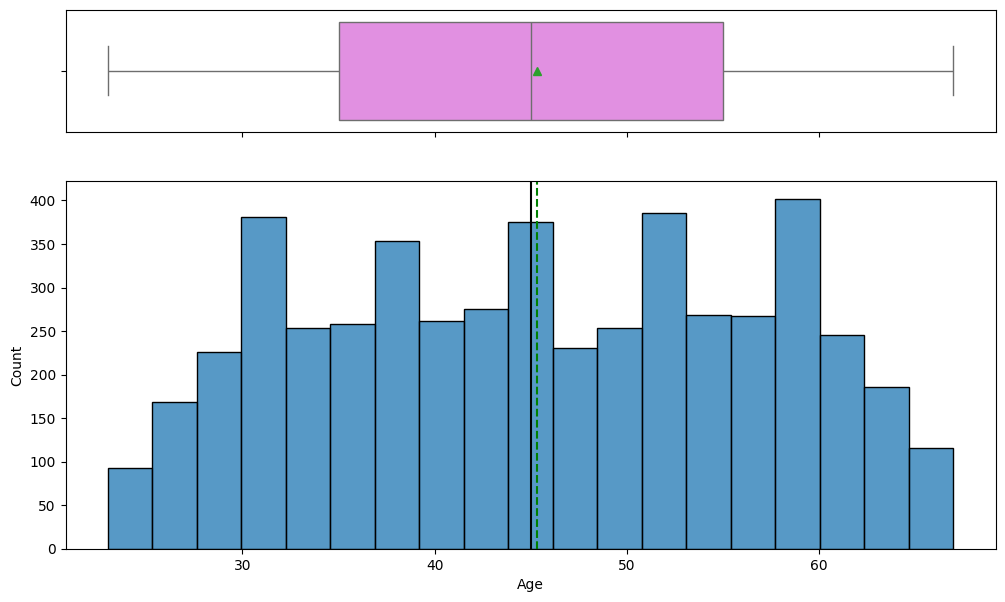

In [13]:
histogram_boxplot(data, "Age")



*   Age exhibit a uniform distribution
*   There are no outliers in Age data



#### Observations on Experience

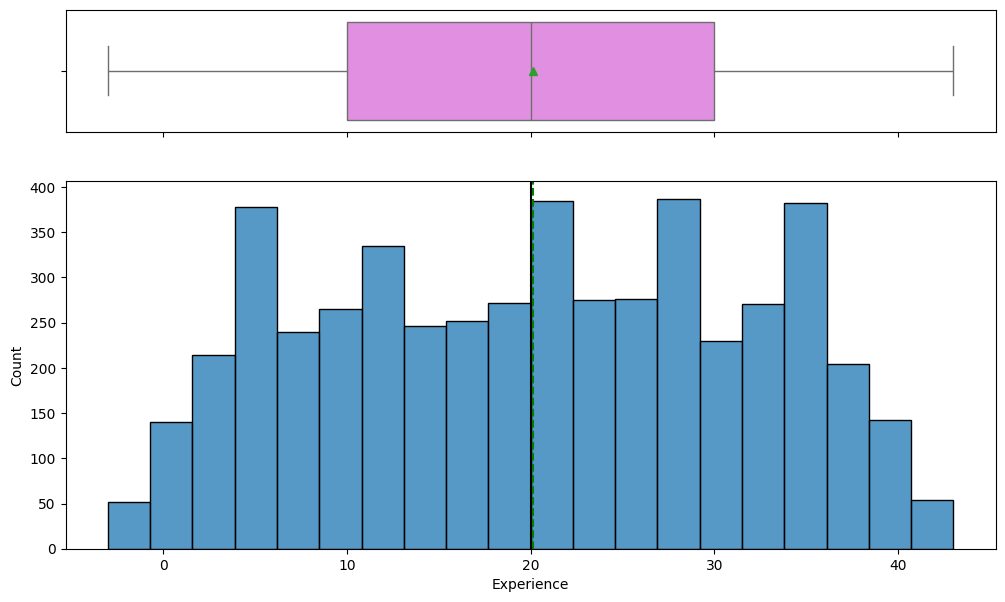

In [14]:
histogram_boxplot(data, "Experience")



*   Experience data shows a slight right skewness
*   There are no outliers in Experience data



#### Observations on Income

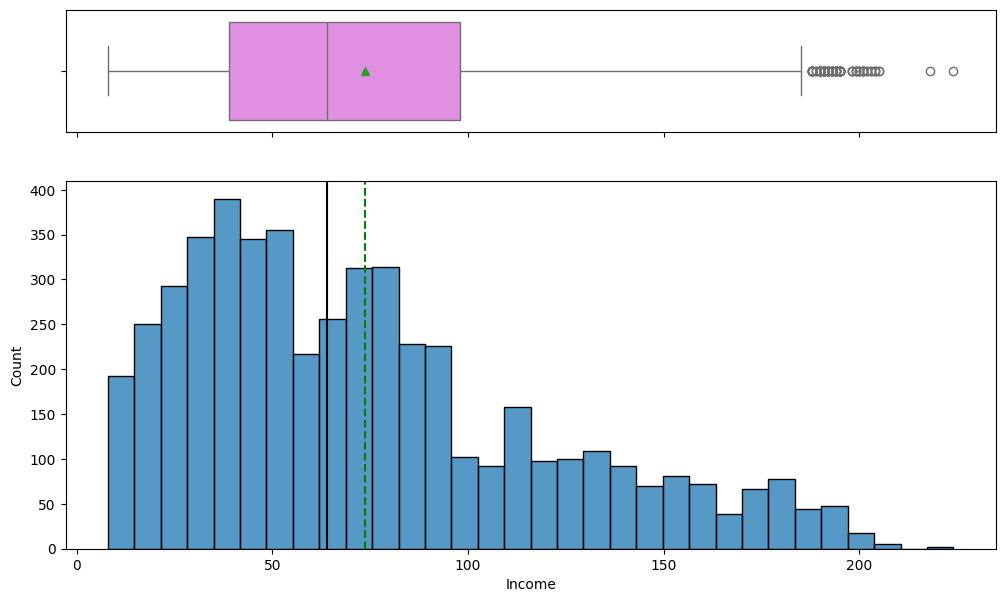

In [15]:
histogram_boxplot(data, "Income")



*   Income data is skewed to the right
*   There are some outliers in Income data



#### Observations on CCAvg

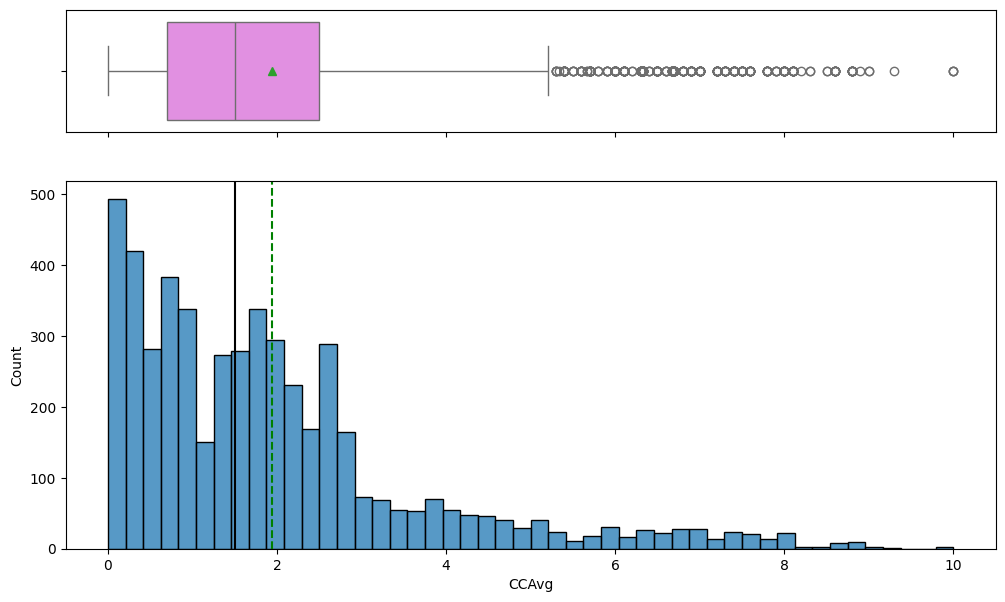

In [16]:
histogram_boxplot(data, "CCAvg")



*   CC Average spending is skewed to the right
*   There are outliers in CC Average spending data



#### Let's check what is the distribution of mortgage attribute. Are there any noticeable patterns or outliers in the distribution?

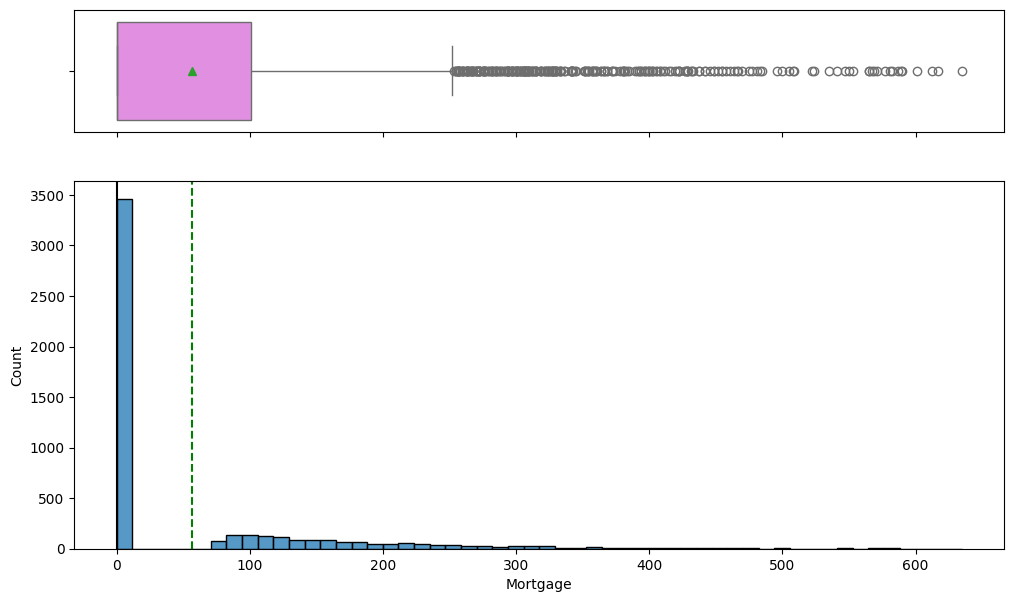

In [17]:
histogram_boxplot(data, "Mortgage")



*   Mortgage data is extremely right skewed
*   Almost 3500 in 5000 customers have 0 mortgage
* There are outliers in mortgage data



#### Observations on Family

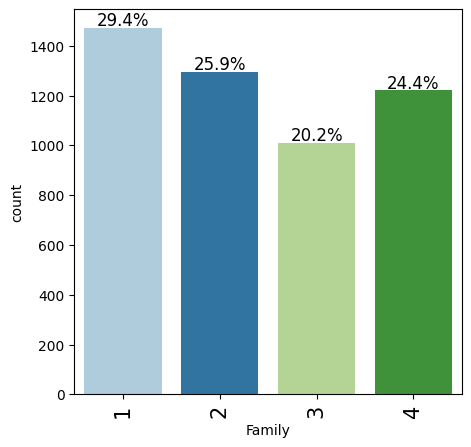

In [18]:
labeled_barplot(data, "Family", perc=True)



*   Customers with 1 person in the family is the highest in the dataset



#### Observations on Education

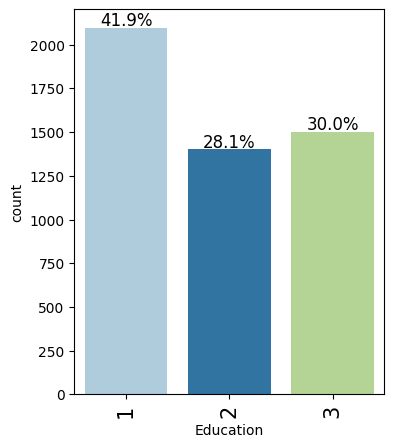

In [19]:
labeled_barplot(data, "Education", perc=True)



*   Undergrad customers are highest in the dataset with ~42%



#### Observations on Securities_Account

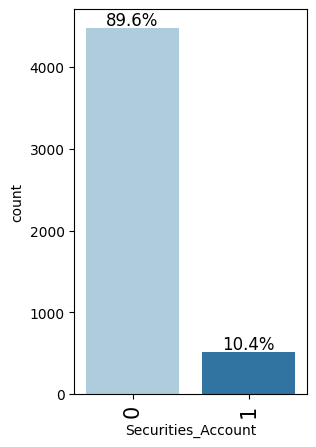

In [20]:
labeled_barplot(data, "Securities_Account", perc=True)



*   Only ~10% of the customers have security account with the bank in the dataset



#### Observations on CD_Account

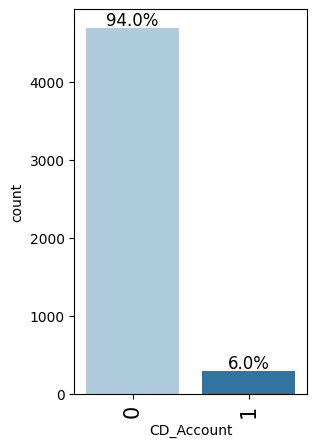

In [21]:
labeled_barplot(data, "CD_Account", perc=True)



*   Only 6% of customers have CD account with the bank in the dataset



#### Observations on Online

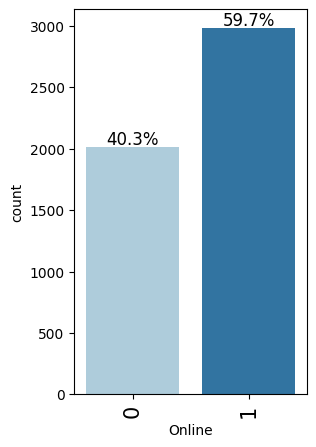

In [22]:
labeled_barplot(data, "Online", perc=True)



*   ~60% of customers in the dataset use internet banking


#### Let's check how many customers have credit cards

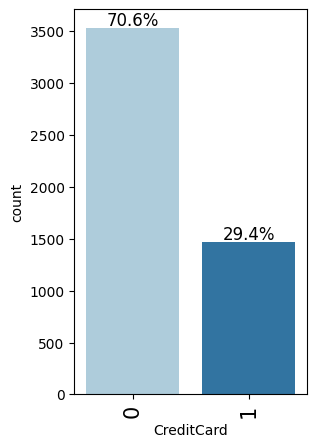

In [23]:
labeled_barplot(data, "CreditCard", perc=True)



*   Approximately 1500 customers use a credit card issued by another bank



### Bivariate Analysis

In [24]:
# function to plot stacked bargraph
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [25]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Let's check what are the attributes that have a strong correlation with the target attribute (personal loan)

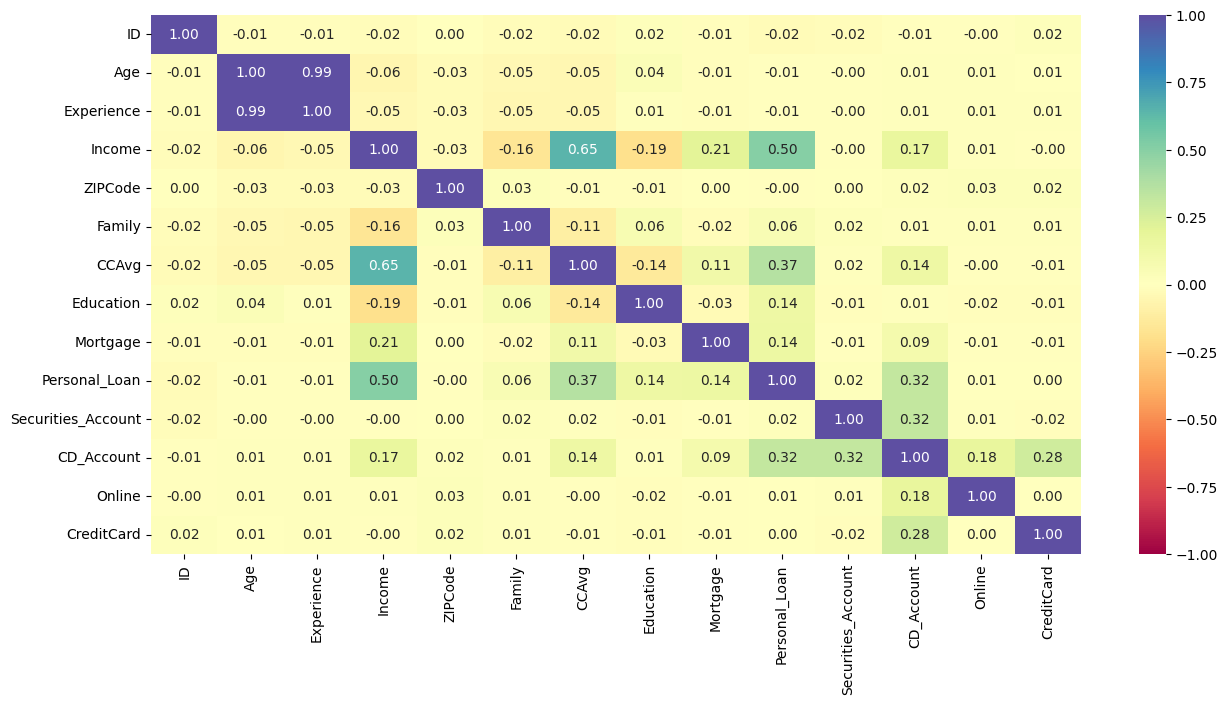

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



*   Attributes 'Income', 'CCAvg', 'CD_Account' has strong positive correlation with 'Personal_Loan' target attribute.
*   Attributes 'Education', 'Mortgage' has moderatively positive correlation with 'Personal_Loan' target attribute.
* Attributes 'Age' and 'Experience' are having a near perfect correlation of 0.99.



#### Customer's interest in purchasing a loan vs their education




Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


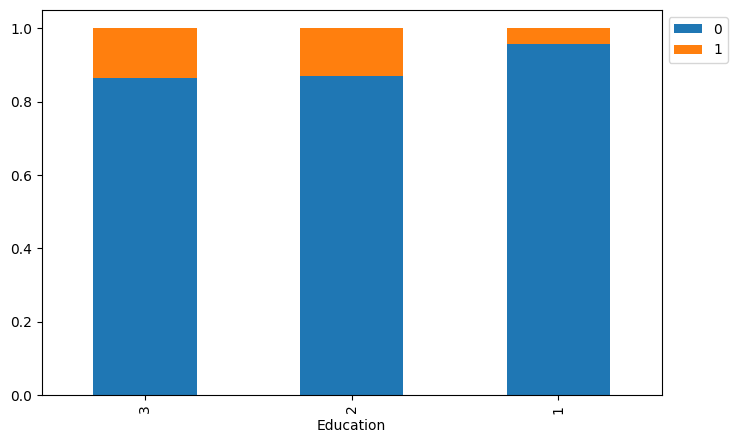

In [27]:
stacked_barplot(data, "Education", "Personal_Loan")



*   'Undergrad' customers took the least amount of personal loans. Their interest in taking personal loans is much lesser than the other groups.
*   By Percentage, 'Professional' & 'Graduate' customers took almost the same number of personal loans, which is higher than 'Undergrads'.



#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


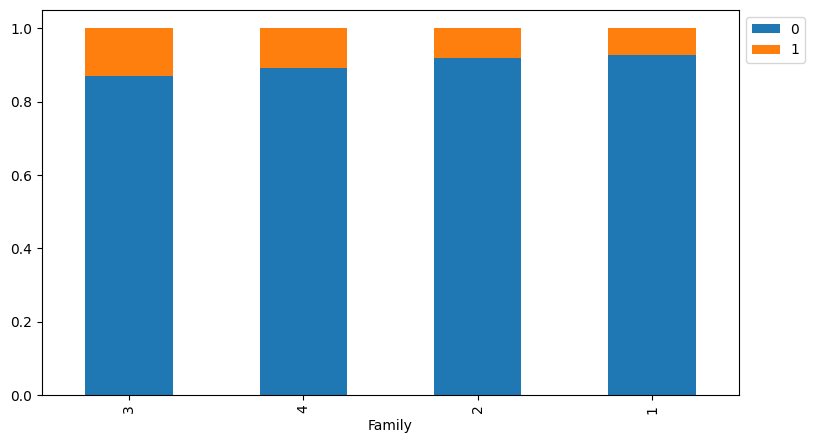

In [28]:
stacked_barplot(data, "Family", "Personal_Loan")



*   By percentage, family of '3' took the most number of personal loans followed by the family of '4'.
*   Family of '2' and '1' took almost the same number of personal loans which was a little lesser than the other groups.



#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


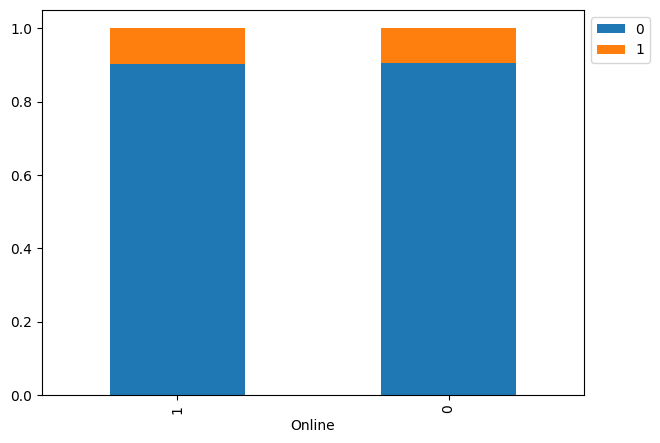

In [29]:
stacked_barplot(data, "Online", "Personal_Loan")



*   There is not much variance in the percentage of customers that opted for personal loan between with and without online account.



#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


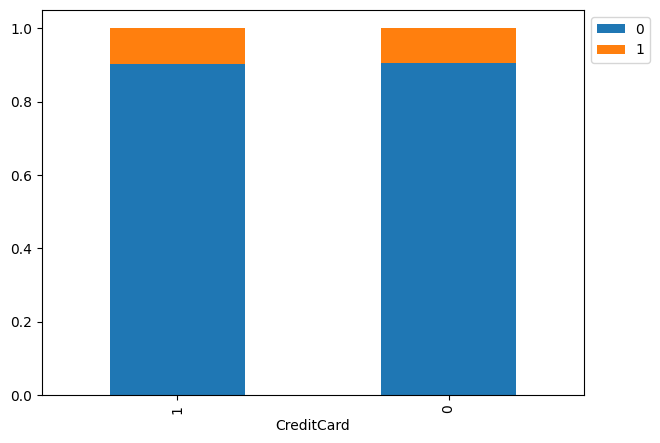

In [30]:
stacked_barplot(data, "CreditCard", "Personal_Loan")



*   There is not much variance in the percentage of customers that opted for personal loan between with and without credit card.



#### Let's check how does a customer's interest in purchasing a loan vary with their age

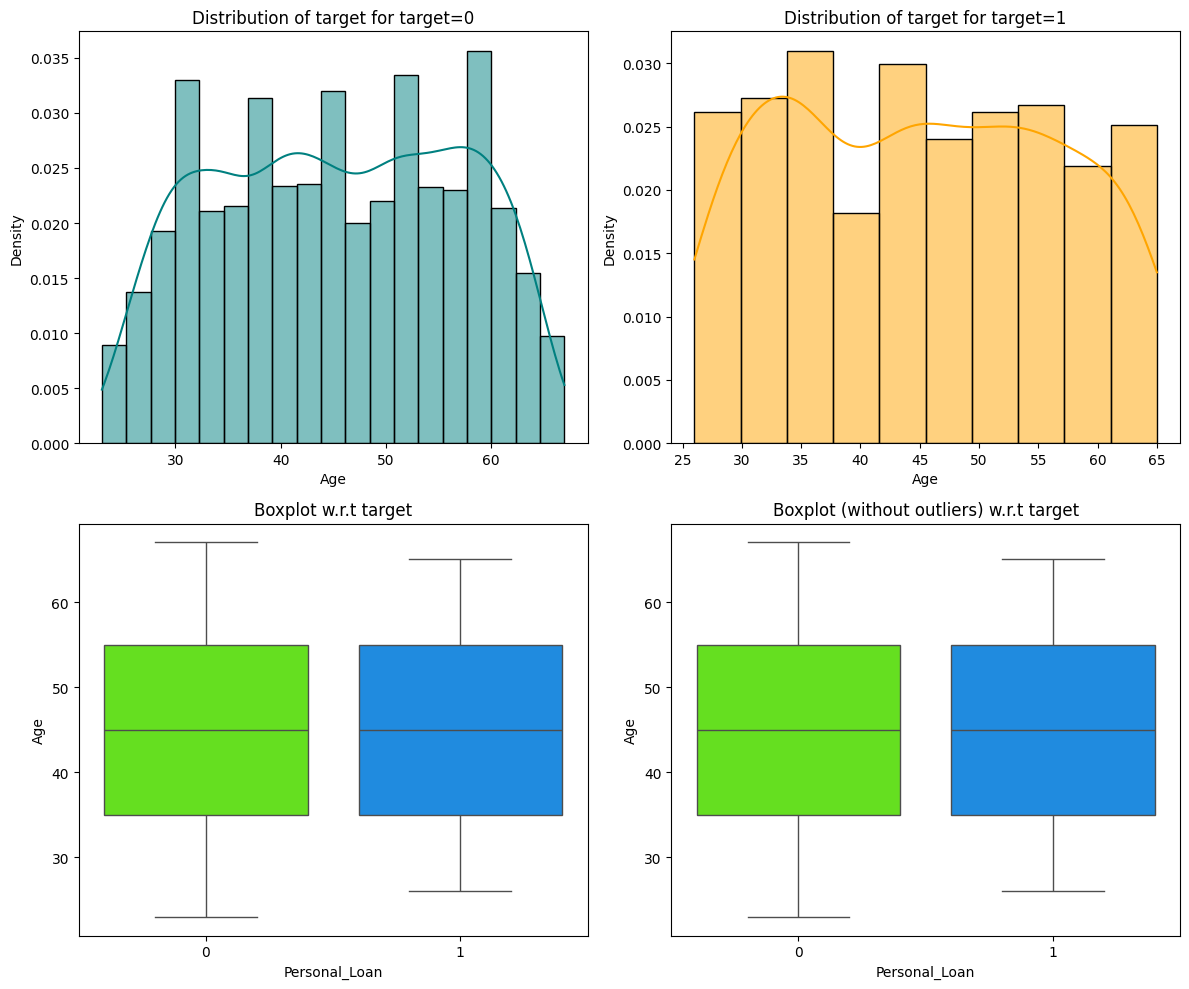

In [31]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")



*   Among the customers that applied for a personal loan, the most number of customers are around the age 35



#### Personal Loan vs Experience

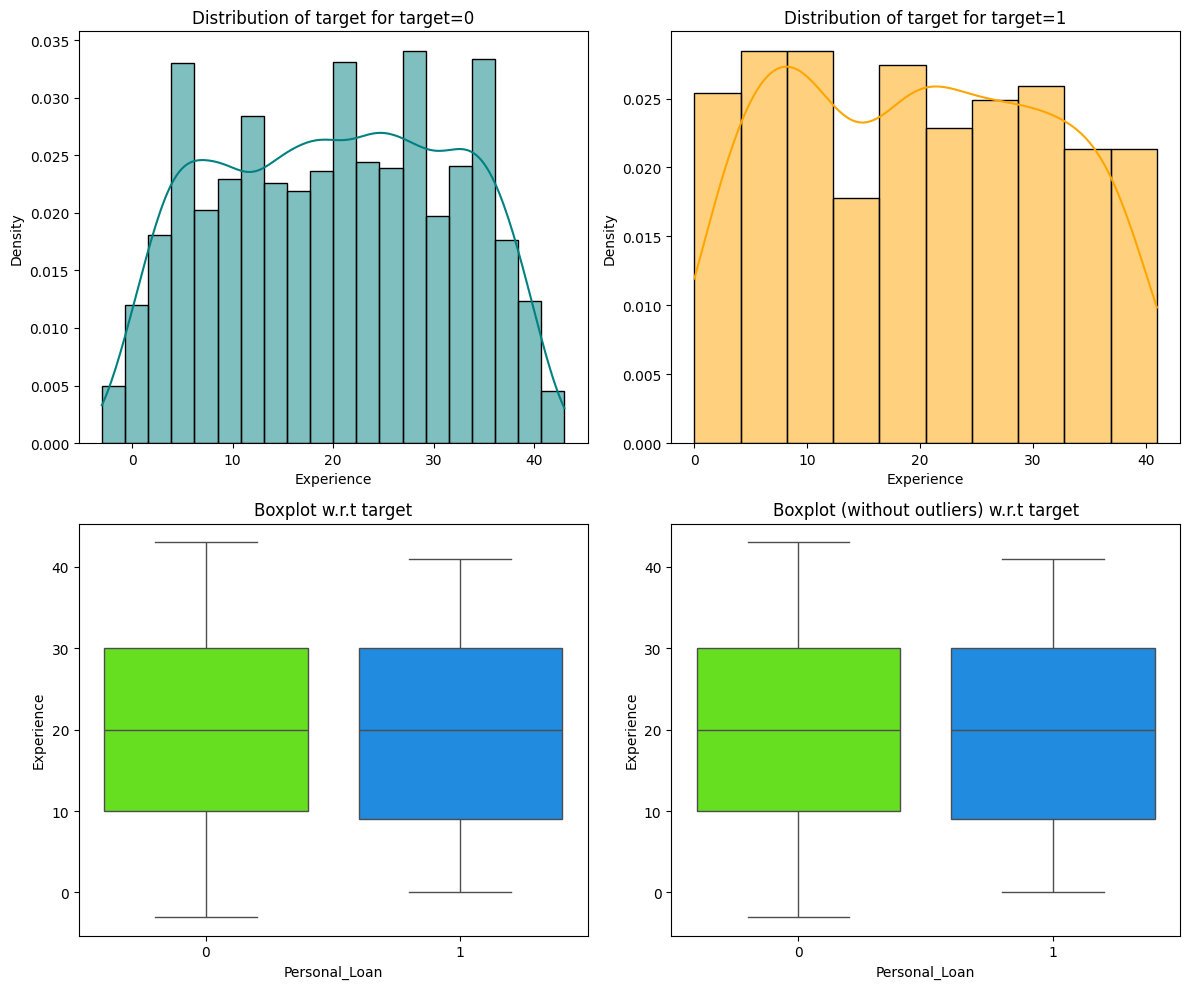

In [32]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")



*   Among the customers who applied for the loan, most are around 10 years of experience.



#### Personal Loan vs Income

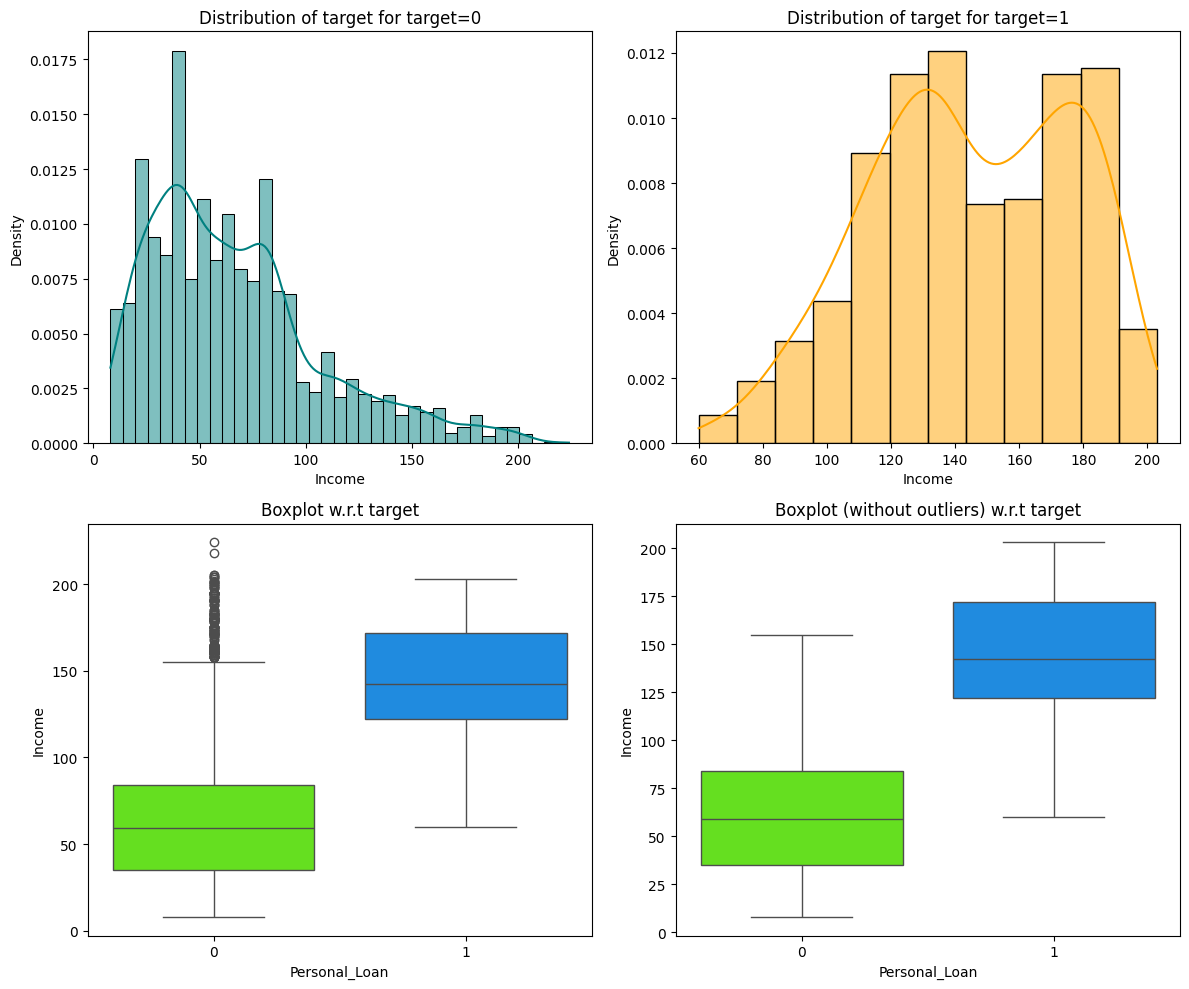

In [33]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")



*   Distribution of the annual income for customers who didn't apply for a loan is right skewed.
*   Distribution of the annual income for customers who did apply for the loan is left skewed. This shows that the higher income customers from around $130k are more probable of applying for the loan.
* There are outliers in the data for the customers who didn't apply for the loan. These are above 150k annual income.



#### Personal Loan vs CCAvg

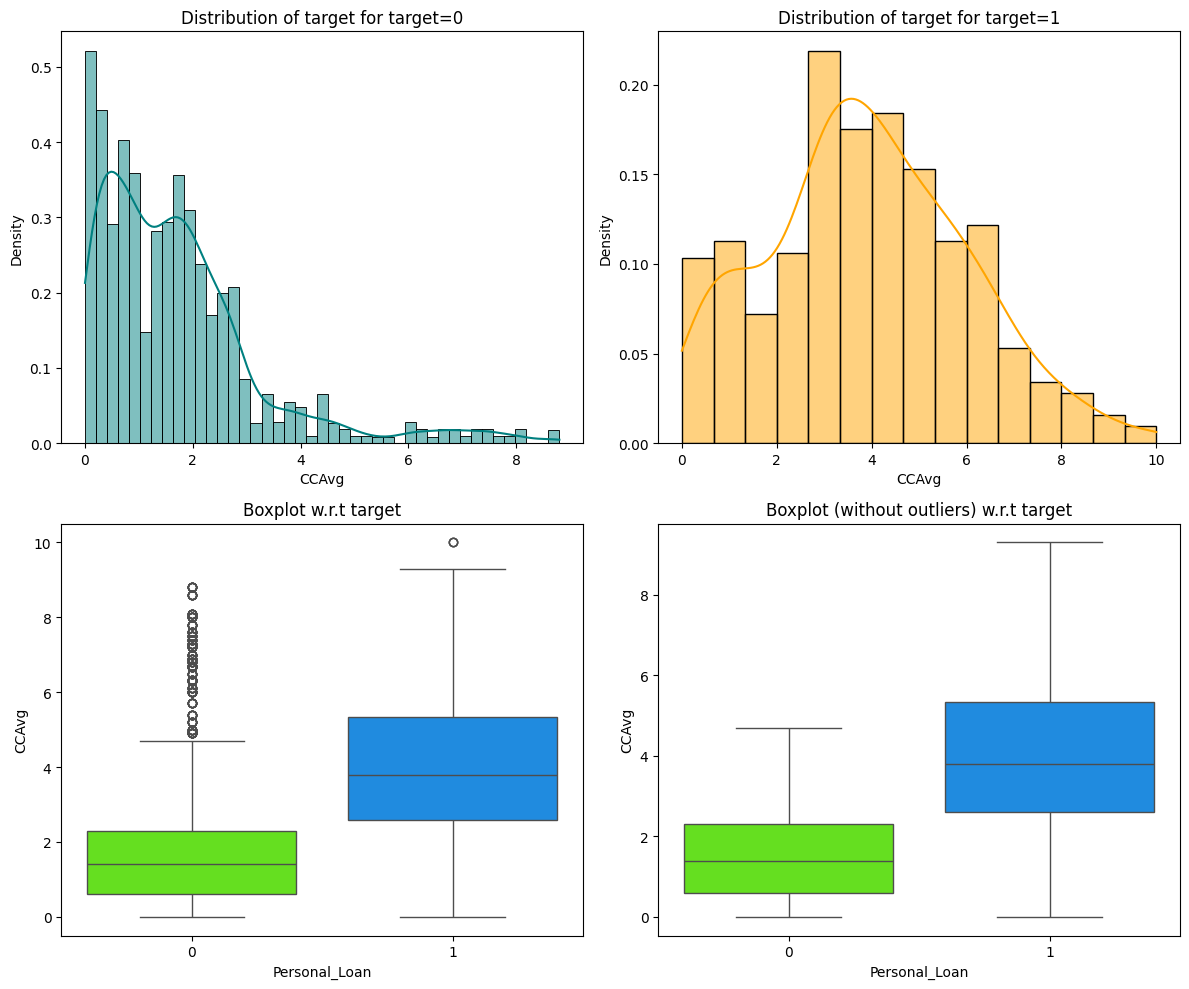

In [34]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

* Distribution of the average spending on credit card by customers who didn't apply for a loan is right skewed.
* Customers who applied for the loan has the highest spending between 3k and 5k dollars.
* There are outliers in the data for the customers who didn't apply for the loan. These are above 5k average spending per month.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Checking for missing value

In [35]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0




*   There are no missing values in any columns.



### Checking for unique values

In [36]:
data['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [37]:
data['CCAvg'].unique()

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [38]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [39]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [40]:
# Correct -ve experience values
data['Experience'].replace(-1, 1, inplace=True)
data['Experience'].replace(-2, 2, inplace=True)
data['Experience'].replace(-3, 3, inplace=True)

In [41]:
data['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43])



*   The -ve values in Experience column is corrected now.



In [42]:
data["Education"].unique()

array([1, 2, 3])

### Feature Engineering



In [43]:
# Check zipcode column values
data['ZIPCode'].nunique()

467

* ZipCode column has 467 unique values, this needs to be reduced in count before doing one-hot encoding.

In [44]:
# Take the first 2 digits from ZIPCode and replace it
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]
data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [45]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   category
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 308.8 KB


* After preprocessing, there are now 7 numerical columns and 7 categorical columns.

### Data preparation for modeling

In [47]:
# Remove 'Experience' column as it has near perfect correlation with 'Age'
X = data.drop(['Personal_Loan','Experience'], axis=1)
Y = data['Personal_Loan']

# one-hot encoding with datatype as integer
X = pd.get_dummies(X, columns=['ZIPCode', 'Education'], drop_first=True, dtype=int)

# split between train and test dataset, use stratify to keep the ratio same
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=1)

In [48]:
print('Shape of the training set:', X_train.shape)
print('Shape of the testing set:', X_test.shape, '\n')
print('Percentage of classes in training set:')
print(100*y_train.value_counts(normalize=True), '\n')
print('Percentage of classes in testing set:')
print(100*y_test.value_counts(normalize=True))

Shape of the training set: (3500, 18)
Shape of the testing set: (1500, 18) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in testing set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64




* We can see that around 90.4% of observations belongs to class 0 (No Loan) and 9.6% observations belongs to class 1 (Took Loan), and this is preserved in the train and test sets.



## Model Building

### Model Evaluation Criterion


**Model can make wrong predictions as:**

* Predict that the customer will not take loan, but might have taken if advertised (FN)
* Predict that the customer will take loan, but didn't take even after advertising (FP)

**Which case is more important?**

*   If the model predicts that the customer will not take loan but in real scenario they might have taken, then the bank is going to loose a potential loan from the customer.
*   If the model predicts that the customer will take loan but didn't take after advertising, the bank would loose some money on advertising.
* Here customer missing out on a potential loan from the customer is more impactful than missing some money on advertising.
* Based on this, the model should be focused on Recall to be maximized, which minimizes the False Negatives.




### Model Building

Reusable functions to calcuate different metrics and confusion matrix

*   The model_performance_classification_sklearn function will be used to check the model performance of models.
*   The confusion_matrix_sklearn function will be used to plot confusion matrix.



In [49]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [50]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree model

In [87]:
# use class_weight as "balanced" as the proportion of loan data is unbalanced
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Check model performance on training data

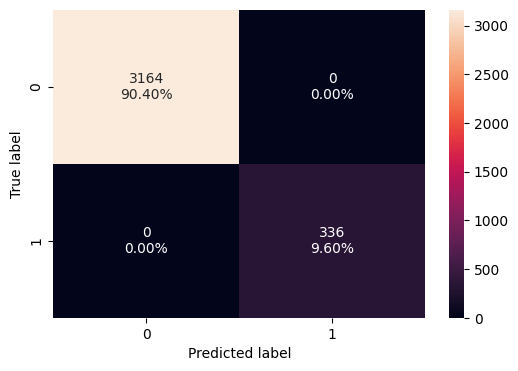

In [52]:
confusion_matrix_sklearn(model, X_train, y_train)

In [53]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0




*   We got the maximum score of 1 for Recall & F1 Score.
* The decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.



#### Visualizing the Decision Tree

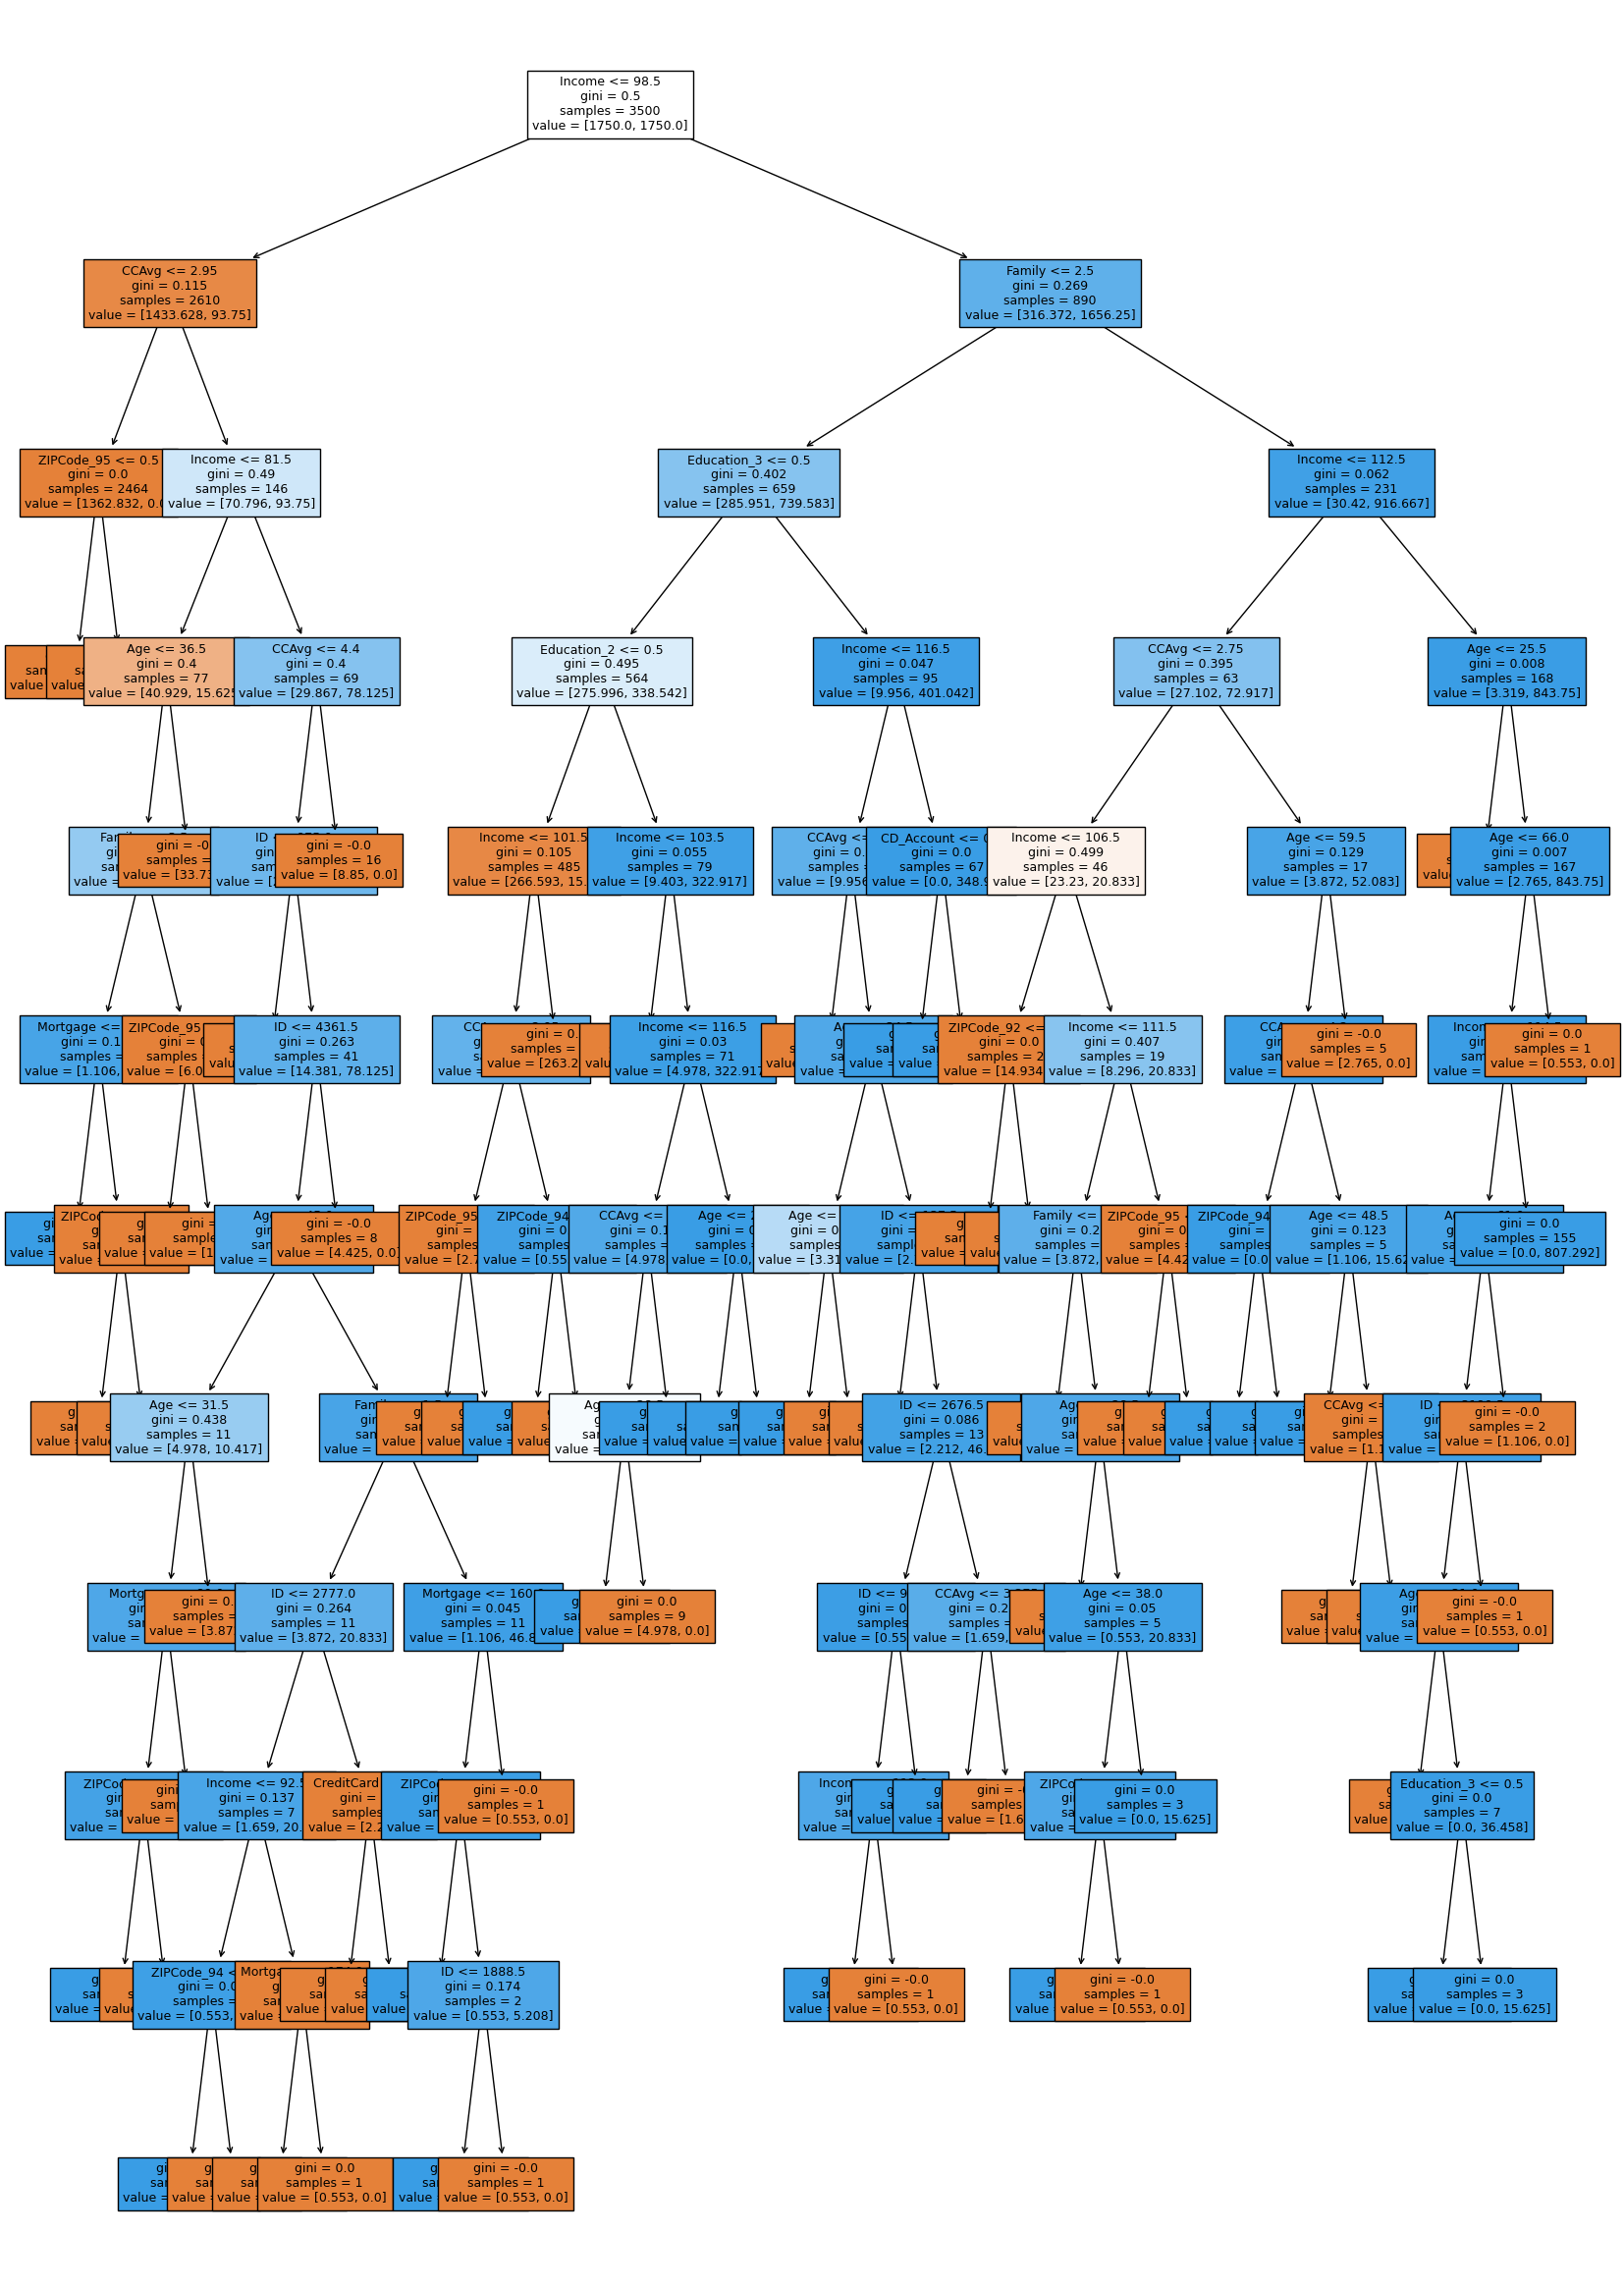

In [54]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 30))

# plotting the decision tree
out = tree.plot_tree(
    model,                          # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

* We can observe that this is a very complex tree.

In [55]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        model,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- ZIPCode_95 <= 0.50
|   |   |   |--- weights: [1125.00, 0.00] class: 0
|   |   |--- ZIPCode_95 >  0.50
|   |   |   |--- weights: [237.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- Mortgage <= 159.50
|   |   |   |   |   |   |--- weights: [0.00, 15.62] class: 1
|   |   |   |   |   |--- Mortgage >  159.50
|   |   |   |   |   |   |--- ZIPCode_92 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_92 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- ZIPCode_95 <= 0.50
|   |   |   |   |   |   |--- weights: [4.98, 0.00] class: 0
|   |   |   |   |   |--- ZIPCode_95 >  0.50
|   |   |   |   |   |   |--- weights: [1.11, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weigh

In [56]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.429485e-01
Education_2         1.464529e-01
CCAvg               7.585330e-02
Education_3         5.081331e-02
Family              4.047620e-02
Age                 2.590687e-02
ID                  1.276407e-02
Mortgage            2.333591e-03
ZIPCode_94          1.797693e-03
ZIPCode_92          6.002401e-04
ZIPCode_91          5.331112e-05
ZIPCode_95          1.591542e-15
CD_Account          2.656605e-16
CreditCard          6.175703e-18
Online              0.000000e+00
Securities_Account  0.000000e+00
ZIPCode_93          0.000000e+00
ZIPCode_96          0.000000e+00


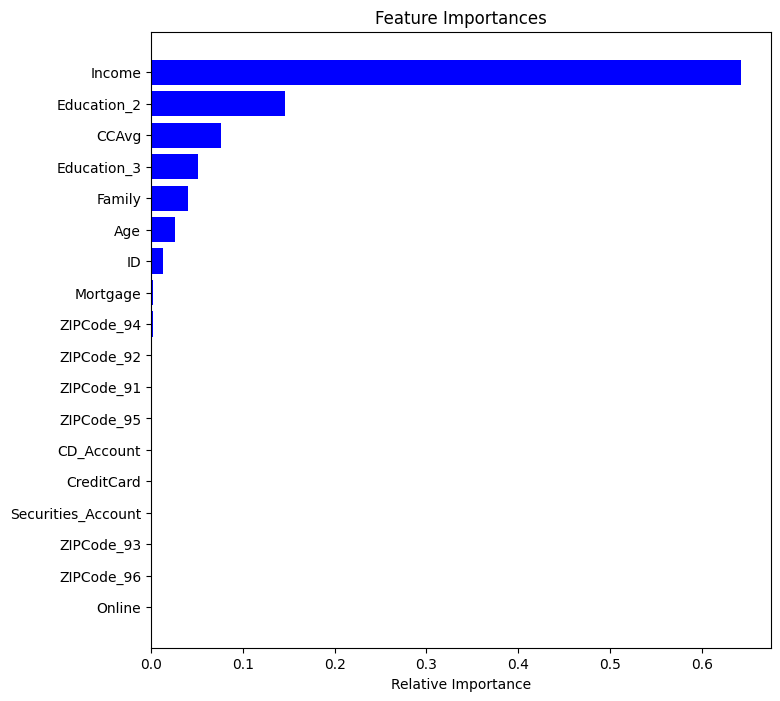

In [57]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   The above graph shows the level of importance of each feature that was considered in the decision making process.




#### Checking model performance on test data

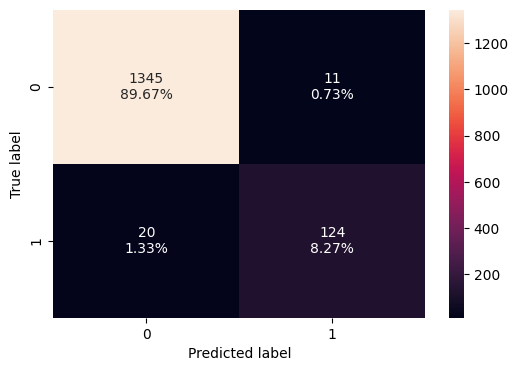

In [58]:
confusion_matrix_sklearn(model, X_test, y_test)

In [59]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.861111,0.918519,0.888889


* There is a noticeable difference between the training and test Recall & F1 Scores.
* This indicates that the model is overfitting.

### Model Performance Improvement

#### Pre-Pruning

In [60]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
  "max_depth": np.arange(4, 15),
  "min_samples_split": [30, 40, 50, 70],
  "max_leaf_nodes": [5, 6, 7, 8, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=6,
                       min_samples_split=30, random_state=1)

**Check model performance on training data**

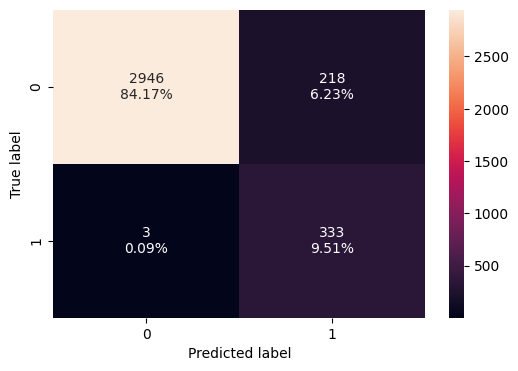

In [61]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [62]:
decision_tree_pre_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_pre_perf_train

,Accuracy,Recall,Precision,F1
0,0.936857,0.991071,0.604356,0.750846


**Visualizing the Decision Tree**

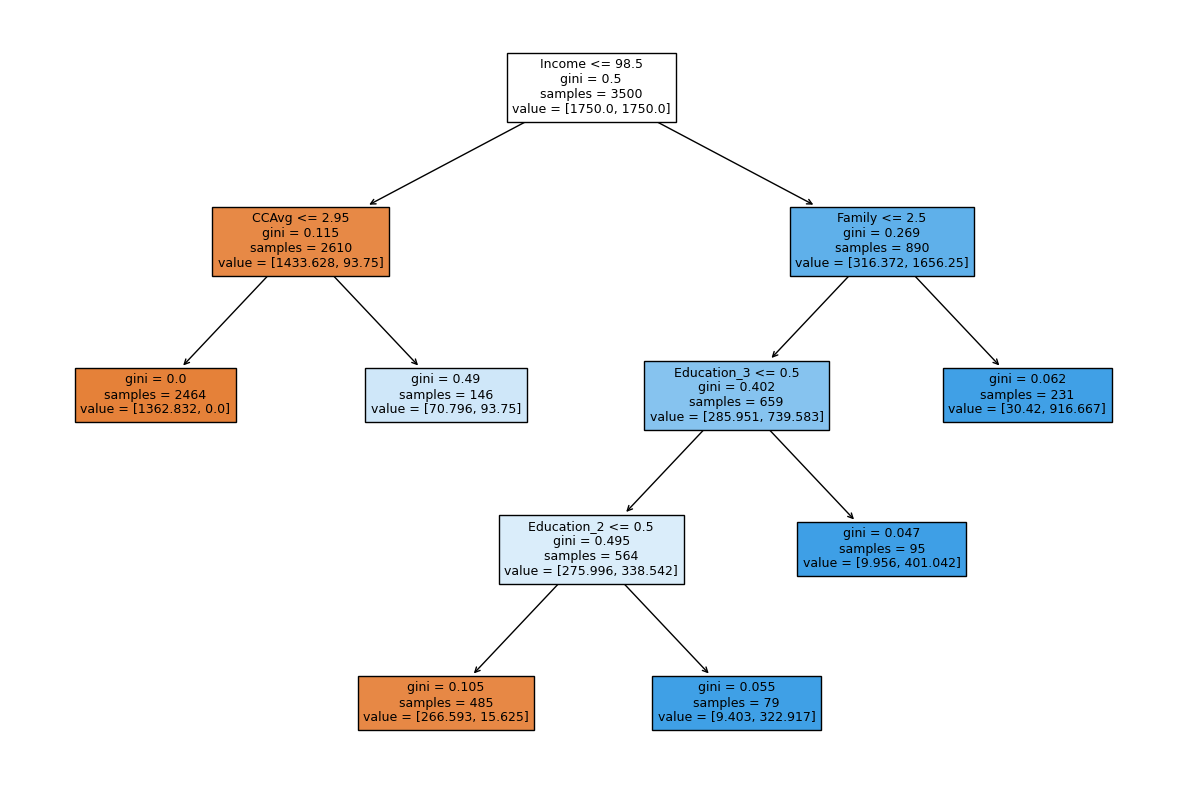

In [63]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [64]:
# Text report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 93.75] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [266.59, 15.62] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [9.40, 322.92] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [9.96, 401.04] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [30.42, 916.67] class: 1



In [65]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.675695
Education_2         0.166077
CCAvg               0.061766
Education_3         0.057622
Family              0.038840
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ID                  0.000000
ZIPCode_91          0.000000
Age                 0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


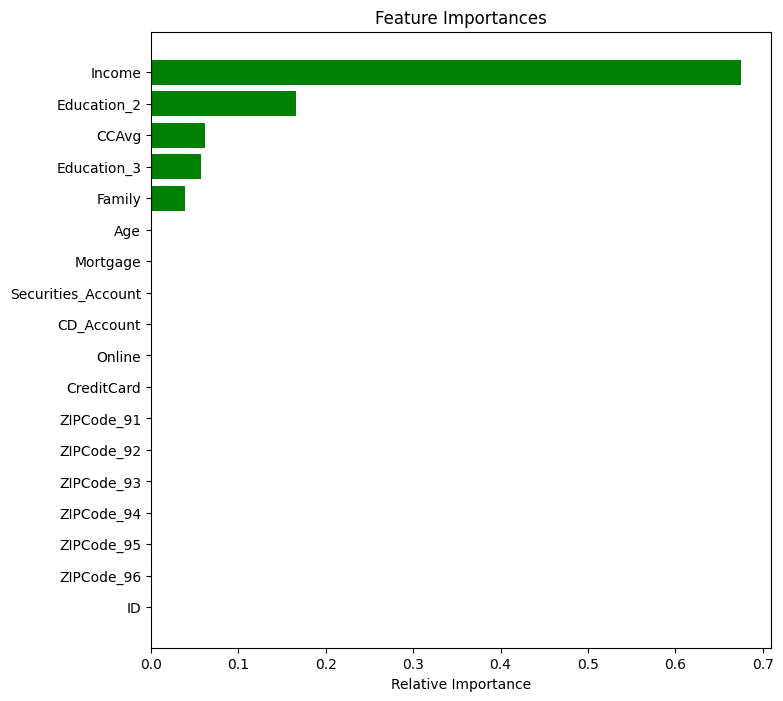

In [66]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

*   The features that the model used and given importance in this case are 'Income' the highest, then 'Education level: Graduate' & 'CCAvg'.



**Checking performance on test data**

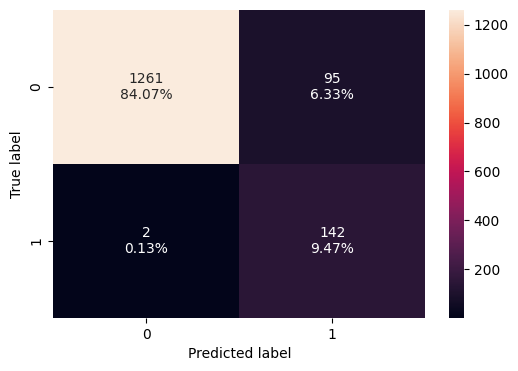

In [67]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [68]:
decision_tree_pre_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_pre_perf_test

,Accuracy,Recall,Precision,F1
0,0.935333,0.986111,0.599156,0.745407


* The pre-pruned model is giving a generalized performance now since the recall scores on both the train and test data are coming to be around 0.99 and F1 Score around 0.75, which shows that the model is able to generalize well on unseen data.

#### Post-Pruning

**Cost-Complexity Pruning**

In [69]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [70]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-3.196043e-17
1,6.316060e-19,-3.132883e-17
2,6.316060e-19,-3.069722e-17
3,1.052677e-18,-2.964455e-17
4,1.543926e-18,-2.810062e-17
5,3.087852e-18,-2.501277e-17
6,3.469447e-18,-2.154332e-17
7,6.938894e-18,-1.460443e-17
8,7.579272e-18,-7.025155e-18
9,8.281057e-18,1.255902e-18


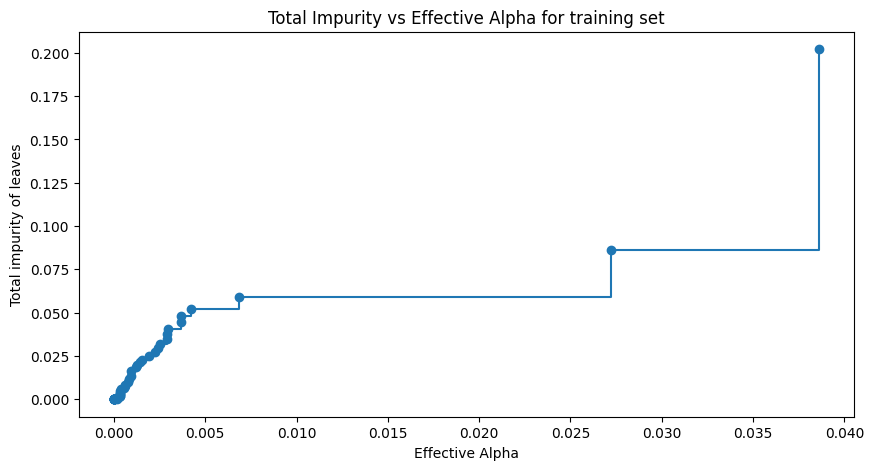

In [71]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

Next, we train a decision tree using the effective alphas. The last value in `ccp_alphas` is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.

In [72]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1, class_weight="balanced")

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.2979272993689452


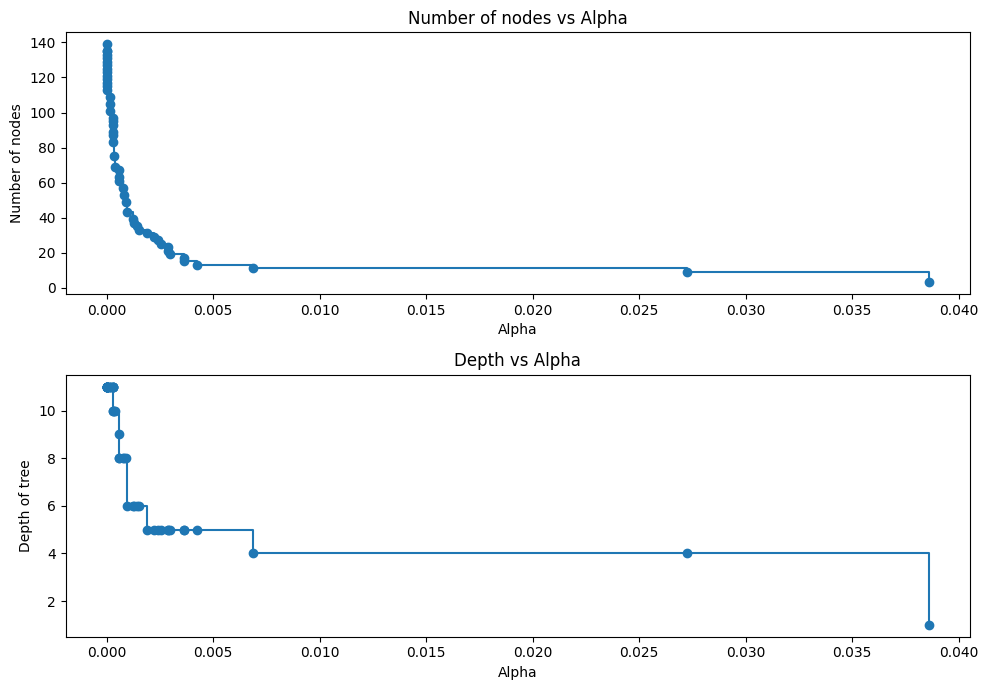

In [73]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

**Recall vs Alpha for training and testing sets**

In [74]:
recall_train = []
# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    pred_train = clf.predict(X_train)
    # Calculate the recall score for the training set predictions compared to true labels
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    pred_test = clf.predict(X_test)
    # Calculate the recall score for the test set predictions compared to true labels
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

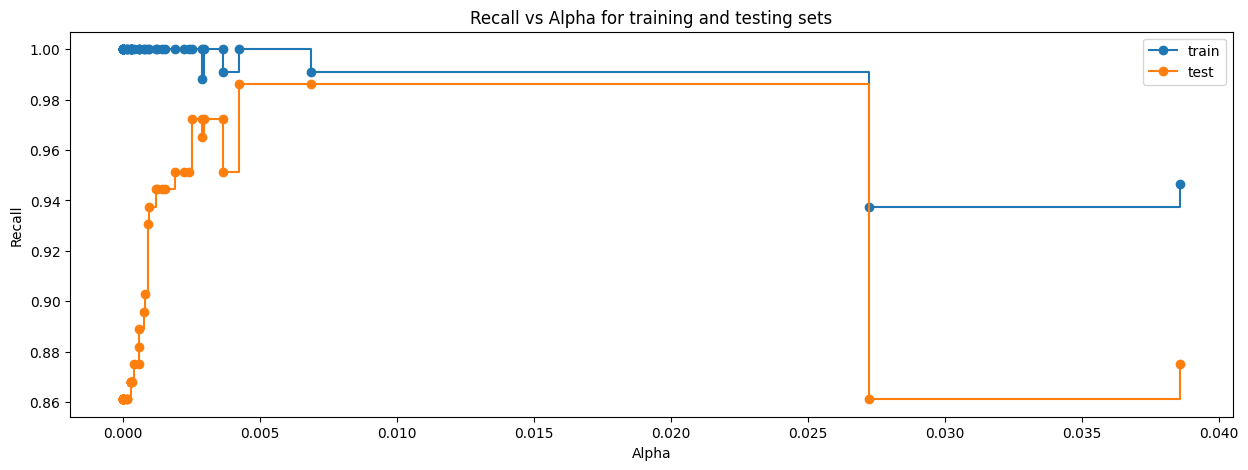

In [75]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs Alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [76]:
# creating the model where we get highest test recall score
index_best_model = np.argmax(recall_test)

# selcting the decision tree model corresponding to the highest recall score
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.004240658160900027, class_weight='balanced',
                       random_state=1)


**Check model performance on training data**

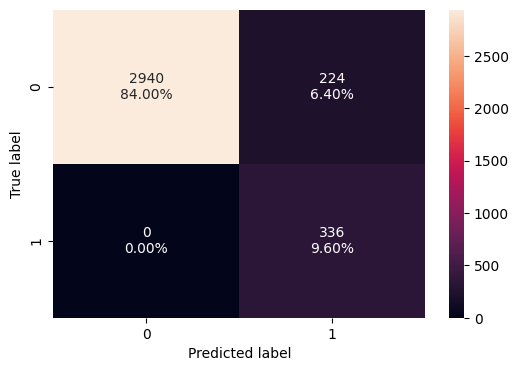

In [77]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [78]:
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.936,1.0,0.6,0.75


**Visualizing the Decision Tree**

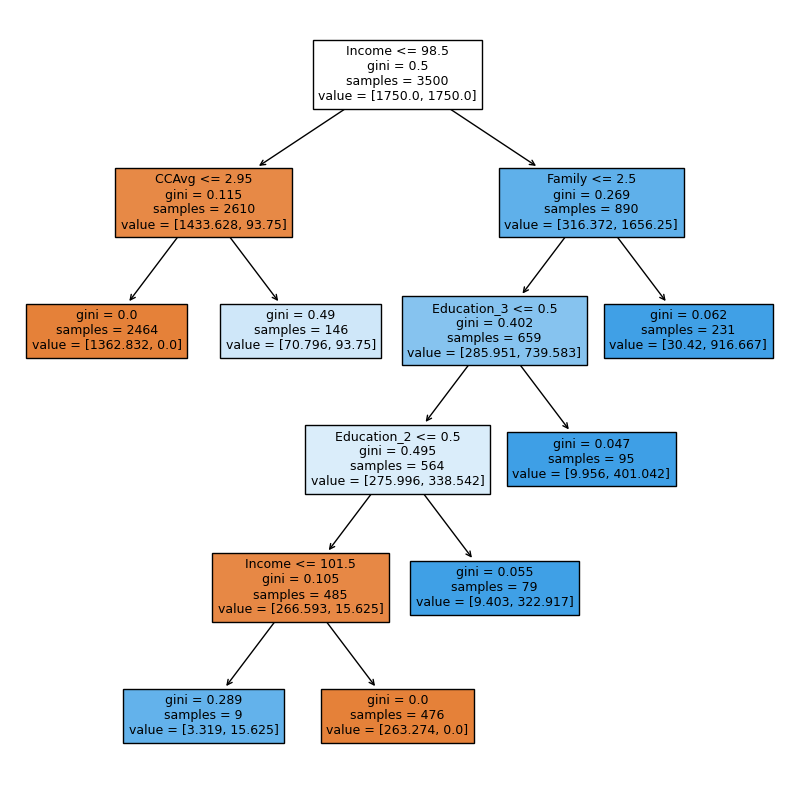

In [79]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [80]:
# Text report showing the rules of a decision tree
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1362.83, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 93.75] class: 1
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 101.50
|   |   |   |   |   |--- weights: [3.32, 15.62] class: 1
|   |   |   |   |--- Income >  101.50
|   |   |   |   |   |--- weights: [263.27, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [9.40, 322.92] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [9.96, 401.04] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [30.42, 916.67] class: 1



In [81]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.680671
Education_2         0.163529
CCAvg               0.060819
Education_3         0.056738
Family              0.038244
ZIPCode_92          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ID                  0.000000
ZIPCode_91          0.000000
Age                 0.000000
Online              0.000000
CD_Account          0.000000
Securities_Account  0.000000
Mortgage            0.000000
CreditCard          0.000000


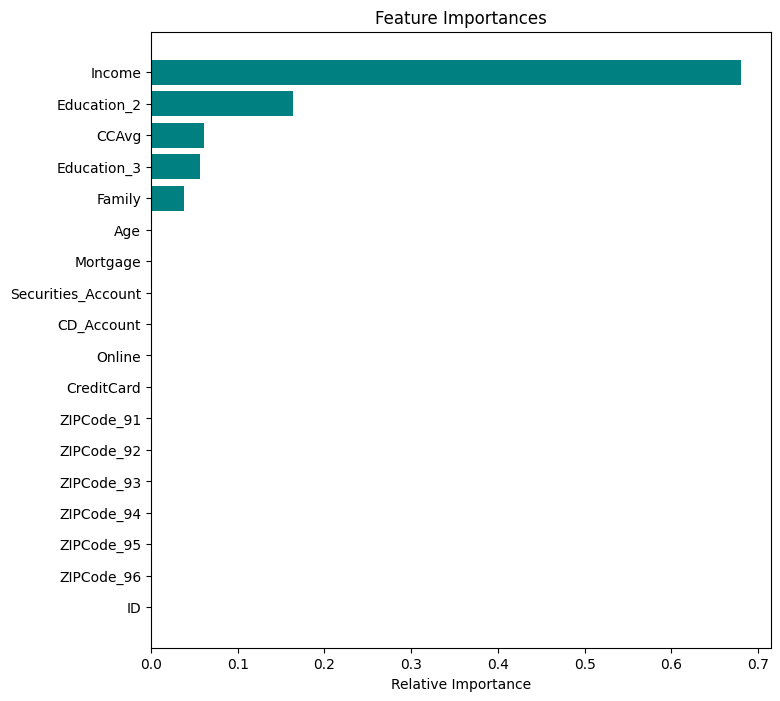

In [82]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="teal", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

'Income' is the most important feature of the post pruned tree, followed by 'Education'.

**Checking performance on test data**

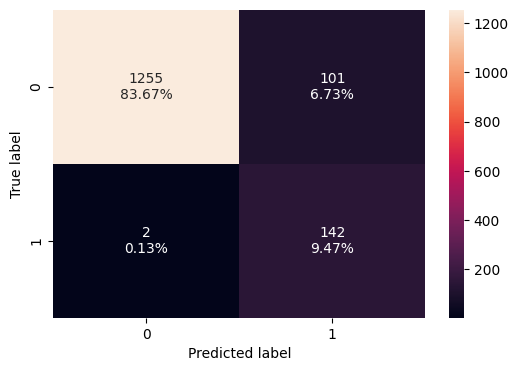

In [83]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [84]:
decision_tree_post_perf_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.931333,0.986111,0.584362,0.73385


* The post-pruned model also is giving a generalized result since the recall scores on both the train and test data are coming to be around 1 and the F1 Score around 0.75 which shows that the model is able to generalize well on unseen data.
* There is a minor reduction in the recall score for test data compared to training data.

## Model Comparison and Final Model Selection

In [85]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_pre_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1
)
models_train_comp_df.columns = [
    "Decision Tree (with class_weight)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (with class_weight),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.936857,0.936
Recall,1.0,0.991071,1.000
Precision,1.0,0.604356,0.600
F1,1.0,0.750846,0.750


In [86]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_pre_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1
)
models_test_comp_df.columns = [
    "Decision Tree (with class_weight)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree (with class_weight),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.979333,0.935333,0.931333
Recall,0.861111,0.986111,0.986111
Precision,0.918519,0.599156,0.584362
F1,0.888889,0.745407,0.733850


* Both the pre-pruned and post-pruned decision trees exhibit generalized performances.

- The pre-pruned tree is giving similar recall scores on both training and test sets.
  - As the scores are similar on both training and test data, this model should perform better on unseen data.
  - This model uses five features for decision-making.

- The post-pruned tree is giving a slightly lower recall score for test set compared to training set.
  - This mode also uses five features for decision-making.

- We will move ahead with the pre-pruned decision tree as our final model.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

  1. The bank can deploy this model to predict if a customer would buy a loan or not.
  2. Income, education, average spending on credit cards per month, and family size are the most important variables in predicting whether a customer will take a loan or not.
  3. Based on the decision tree, it's noticeable that if the customer's income is less than or equal to 98.5k and their average spending on credit cards per month is over 2.95k, that customer is most likely to take a loan.
  4. For customers with income greater than 98.5k, if the education is 'Graduate' level or higher, the probability of that customer getting the loan is higher.


___